In [660]:
import visualisation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

reload(visualisation)

<module 'visualisation' from 'visualisation.pyc'>

In [661]:
# Loading the stuff
path = "../experiments/experiments/percolate-plus/cgn/na/1"
weights = visualisation.load_weights(path)
graphs = visualisation.load_graph(path)
representations = visualisation.load_representation(path)
grads = visualisation.load_gradients(path)

In [721]:
to_check = 86

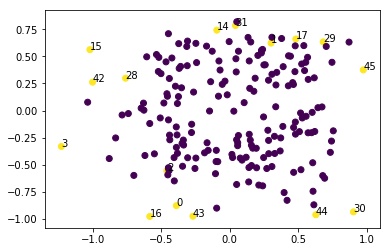

In [722]:
# 2d embeddings
emb = weights['emb.emb']

emb_2d = emb
if emb.shape[1] != 2:
    emb = emb
    pca = PCA(n_components=2)
    emb_2d = pca.fit_transform(emb)

    
    
important_nodes = [0, 1, 2, 3, 14, 15, 16, 17, 28, 29, 30, 31, 42, 43, 44, 45]
visualisation.scatter_easily(emb_2d, color=[1 if i in important_nodes else 0 for i in range(emb.shape[0])],
                            annotation=zip([0, 1, 2, 3, 14, 15, 16, 17, 28, 29, 30, 31, 42, 43, 44, 45], 
                                          [0, 1, 2, 3, 14, 15, 16, 17, 28, 29, 30, 31, 42, 43, 44, 45]))



#visualisation.scatter_easily(emb_2d, color=(representations['emb']['output'][example_no] ** 2).sum(axis=-1),
#                            annotation=zip([0, 1, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21, 27, 28, 29, 30],
#                                          [0, 1, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21, 27, 28, 29, 30]))

#print "with representation:"
#visualisation.scatter_easily(emb_2d, color=(representations['emb']['output'][0] ** 2).sum(axis=-1), 
#                            annotation = enumerate(range(16)))

#print "with gradient:"
#visualisation.scatter_easily(emb_2d, color=(grads['emb'][0] ** 2).sum(axis=-1))
#plt.plot()

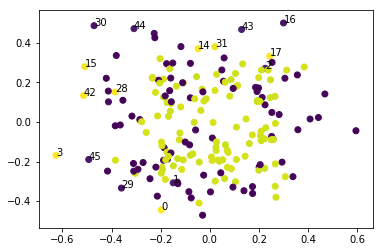

In [723]:
# 2d embeddings
emb = representations['emb']['output'][to_check]
emb_2d = emb
if emb.shape[1] != 2:
    emb = emb
    pca = PCA(n_components=2)
    emb_2d = pca.fit_transform(emb)

visualisation.scatter_easily(emb_2d, color=(representations['example']['input'][to_check]).sum(axis=-1),
                            annotation=zip([0, 1, 2, 3, 14, 15, 16, 17, 28, 29, 30, 31, 42, 43, 44, 45], 
                                          [0, 1, 2, 3, 14, 15, 16, 17, 28, 29, 30, 31, 42, 43, 44, 45]))

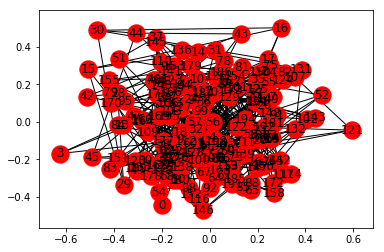

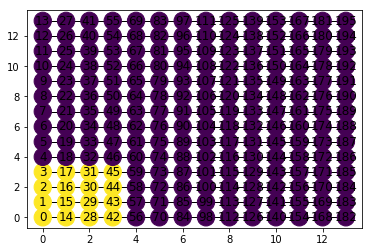

In [724]:
# Plotting the embedding again.
reload(visualisation)
visualisation.draw_graph(graphs[0][0], pos=list(emb_2d))
visualisation.draw_graph(graphs[0][0], [1 if i in important_nodes else 0 for i in range(emb.shape[0])])

86
target: 1, prediction: 1
Input:


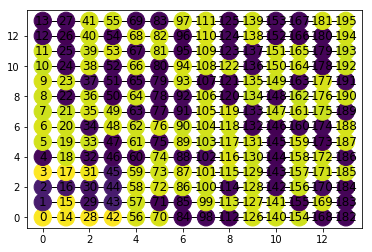

For emb


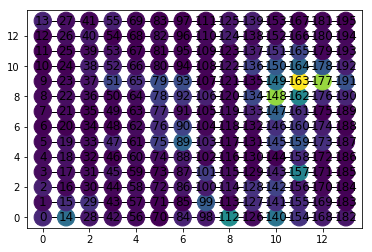

For layer_0


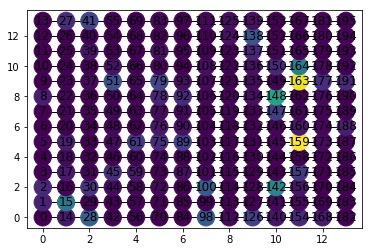

For layer_1


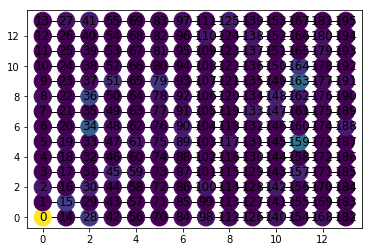

For layer_2


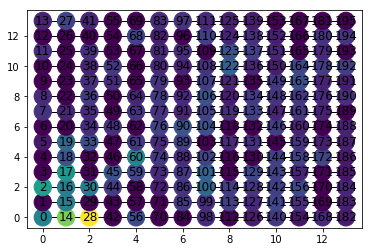

target: 1, prediction: 1
Input:


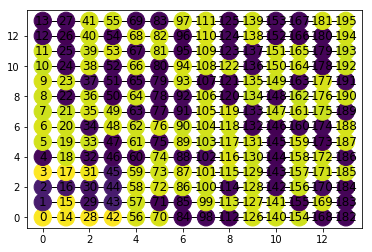

For emb


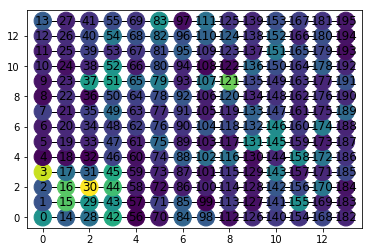

For layer_0


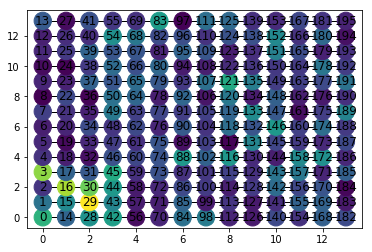

For layer_1


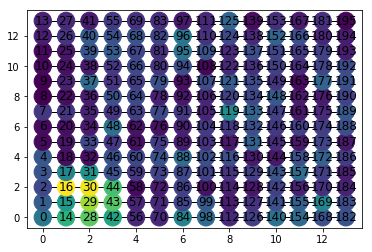

For layer_2


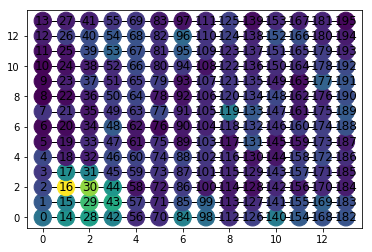

In [725]:
reload(visualisation)
print to_check
visualisation.visualize_all(representations, graphs[0][0], to_check, ['emb', 'layer_0', 'layer_1', 'layer_2'], grads)
visualisation.visualize_all(representations, graphs[0][0], to_check, ['emb', 'layer_0', 'layer_1', 'layer_2'])

In [719]:
for i, p in enumerate(representations['example']['output']):
    print i, representations['example']['output'][i], np.argmax(representations['logistic']['output'][i])

0 1 1
1 0 0
2 1 1
3 1 1
4 0 0
5 0 0
6 1 1
7 1 1
8 0 0
9 1 1
10 1 1
11 0 0
12 0 0
13 0 0
14 0 0
15 0 0
16 1 1
17 0 0
18 0 0
19 0 0
20 1 1
21 0 1
22 0 0
23 1 0
24 1 1
25 0 0
26 1 1
27 0 0
28 0 0
29 0 0
30 0 0
31 0 0
32 1 0
33 0 0
34 0 0
35 1 0
36 0 0
37 0 0
38 1 1
39 0 0
40 0 0
41 1 1
42 1 1
43 0 1
44 0 0
45 0 0
46 1 1
47 0 1
48 1 1
49 0 0
50 0 0
51 1 1
52 1 0
53 0 1
54 1 0
55 1 1
56 1 0
57 1 1
58 1 1
59 1 1
60 1 1
61 1 1
62 0 0
63 1 1
64 0 0
65 1 0
66 1 0
67 0 0
68 0 0
69 0 0
70 0 0
71 1 1
72 0 0
73 1 1
74 1 1
75 1 1
76 0 0
77 0 0
78 1 1
79 1 1
80 1 1
81 0 0
82 1 1
83 0 1
84 0 0
85 0 0
86 1 1
87 0 0
88 1 1
89 0 1
90 0 0
91 1 1
92 0 0
93 0 0
94 1 1
95 0 0
96 0 0
97 1 1
98 0 0
99 1 1


86
For emb


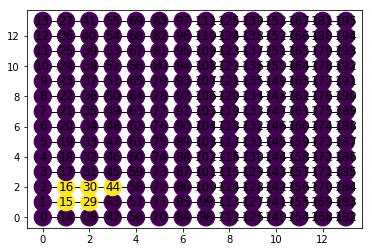

For layer_0


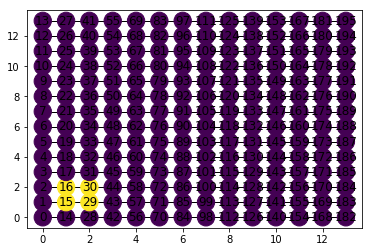

For layer_1


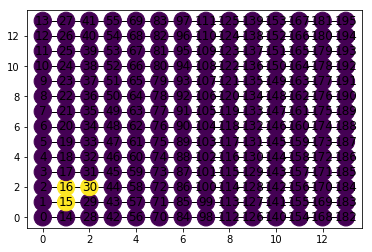

For layer_2


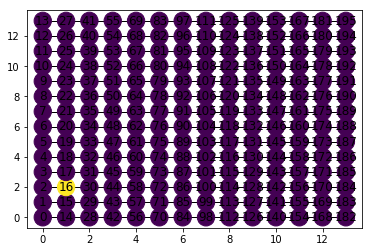

In [726]:
reload(visualisation)
important_layer = ['layer_2', 'layer_1', 'layer_0', 'emb']
print to_check
important_nodes = visualisation.extract_chain_representation_2(representations, graphs[0][0], to_check, important_layer, 3)

for layer_name, important_for_this_layer in zip(important_layer[::-1], important_nodes[::-1]):
    print "For {}".format(layer_name)
    
    visualisation.draw_graph(graphs[0][0], node_color=[1 if i in important_for_this_layer else 0 for i in range(graphs[0][0].shape[0])])


In [690]:
all_pos = []


for ex in range(100):
    
    input = representations['example']['input'][ex]
    if representations['example']['output'][ex] != 0:
        all_pos.append(input[:, 0])
        
all_pos = np.array(all_pos)

all_neg = []


for ex in range(100):
    
    input = representations['example']['input'][ex]
    if representations['example']['output'][ex] != 1:
        all_neg.append(input[:, 0])
        
all_neg = np.array(all_neg)
    


In [612]:
all_pos.mean(axis=0).shape

(196,)

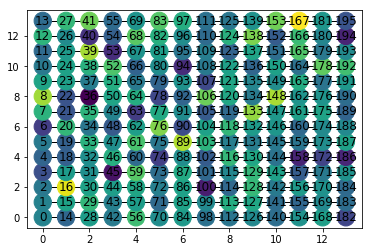

In [613]:
visualisation.draw_graph(graphs[0][0], node_color=all_pos.mean(axis=0), pos=None)

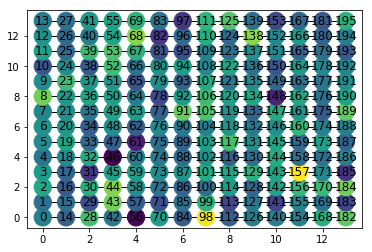

In [628]:
visualisation.draw_graph(graphs[0][0], node_color=all_neg.mean(axis=0), pos=None)

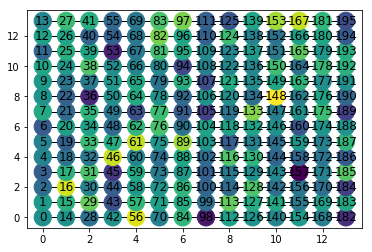

In [631]:
visualisation.draw_graph(graphs[0][0], node_color=all_pos.mean(axis=0) - all_neg.mean(axis=0), pos=None)

In [728]:
weights.keys()

['emb.emb',
 'my_convs.0.linear.weight',
 'my_convs.0.linear.bias',
 'my_convs.0.eye_linear.weight',
 'my_convs.0.eye_linear.bias',
 'my_convs.1.linear.weight',
 'my_convs.1.linear.bias',
 'my_convs.1.eye_linear.weight',
 'my_convs.1.eye_linear.bias',
 'my_convs.2.linear.weight',
 'my_convs.2.linear.bias',
 'my_convs.2.eye_linear.weight',
 'my_convs.2.eye_linear.bias',
 'my_logistic_layers.0.weight',
 'my_logistic_layers.0.bias']

In [733]:

for i in range(64):
    print weights['my_convs.0.linear.weight'][i]

[[-1.05021954]
 [-1.00953364]]
[[ 0.20615253]
 [ 1.23298621]]
[[ 0.43986616]
 [ 0.50555199]]
[[ 0.93183798]
 [ 0.88640189]]
[[-0.21274601]
 [-1.27516925]]
[[ 0.09782805]
 [ 0.11465962]]
[[-0.49662793]
 [ 0.98839074]]
[[ 1.73410094]
 [ 0.07404931]]
[[-0.20011838]
 [-1.44835413]]
[[-0.63781732]
 [ 0.51229936]]
[[-0.44257203]
 [-1.20900559]]
[[-1.11708522]
 [-1.01875162]]
[[-0.6339007]
 [-0.1366505]]
[[-0.60151684]
 [-0.22759594]]
[[-0.19369712]
 [ 1.06446743]]
[[-1.54108322]
 [-0.12504575]]
[[ 1.16426766]
 [-0.83518583]]
[[-0.32333353]
 [ 0.65172517]]
[[-0.97324258]
 [-0.83623552]]
[[-1.1203655 ]
 [ 0.74248242]]
[[-0.38128847]
 [-0.01077957]]
[[-0.56261808]
 [ 0.13127542]]
[[ 0.08168734]
 [-1.35200095]]
[[ 1.26591671]
 [-0.69760615]]
[[ 0.62804723]
 [ 0.47969484]]
[[ 1.65862787]
 [ 0.21098807]]
[[-1.29657948]
 [-0.34276041]]
[[-0.09913061]
 [-0.81457847]]
[[-0.61259139]
 [-0.41475171]]
[[-0.34119076]
 [ 0.52799773]]
[[ 0.58473557]
 [-0.61797762]]
[[ 1.11676264]
 [-0.64228475]]
[[ 0.38459

In [734]:
weights['my_convs.0.linear.weight'].shape

(64, 2, 1)

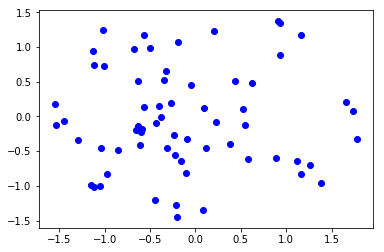

In [735]:
visualisation.scatter_easily(weights['my_convs.0.linear.weight'][:, :, 0])